# Esstimate the house price

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.shape

(545, 13)

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [9]:
print(df.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


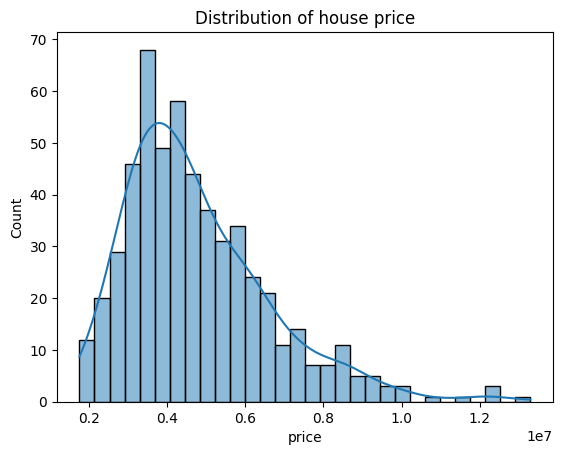

In [10]:
# Distribution of houseprice
sns.histplot(df['price'], kde   = True, bins = 30)
plt.title('Distribution of house price')
plt.show()

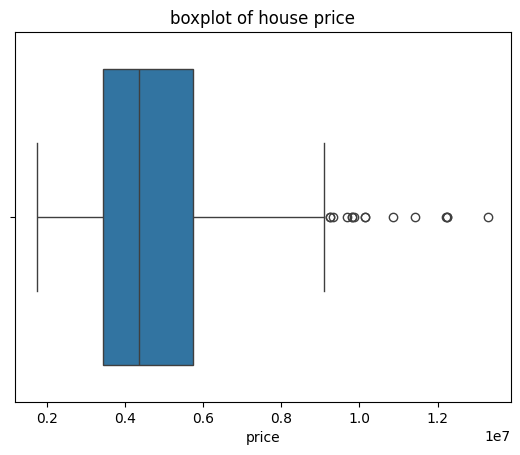

In [14]:
# boxplot for detecting the outlier
sns.boxplot(x = df['price'])
plt.title("boxplot of house price")
plt.show()

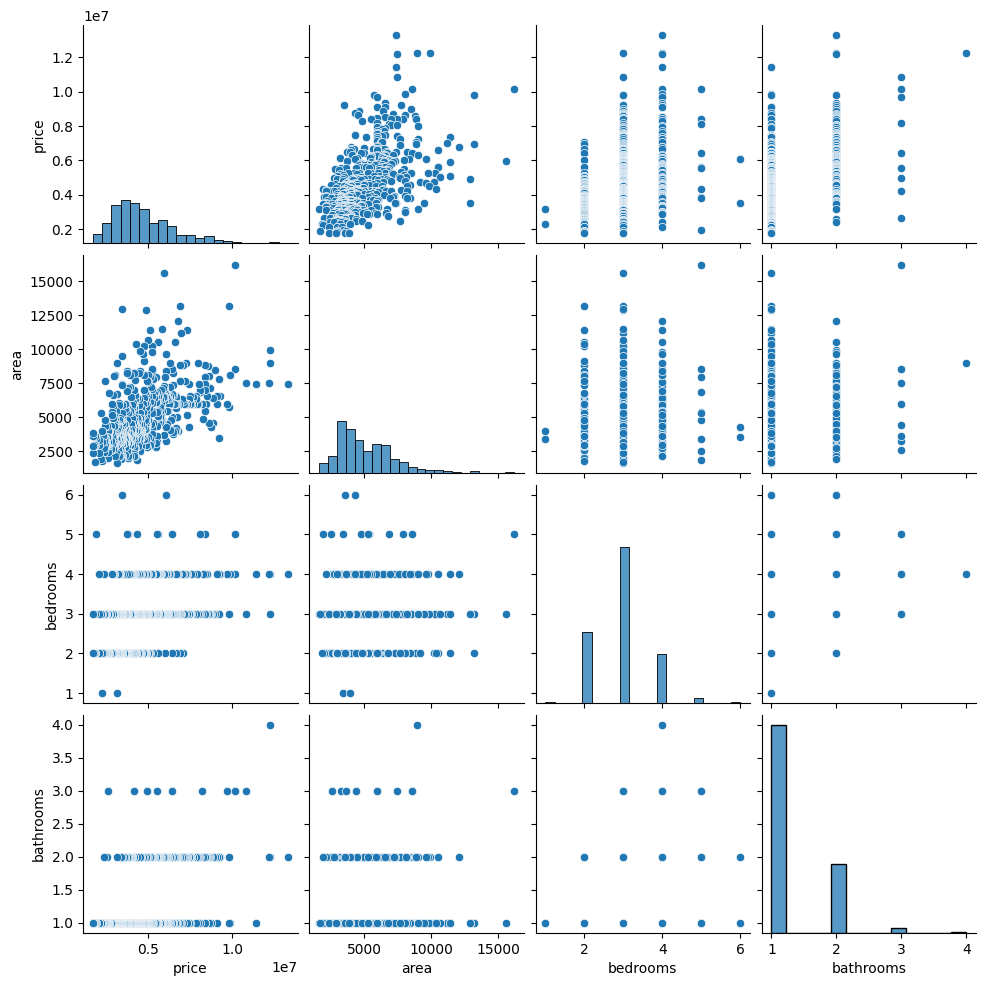

In [15]:
# pair plot for feature relationship
sns.pairplot(df[['price','area','bedrooms','bathrooms']])
plt.show()

# Stastical Analysis

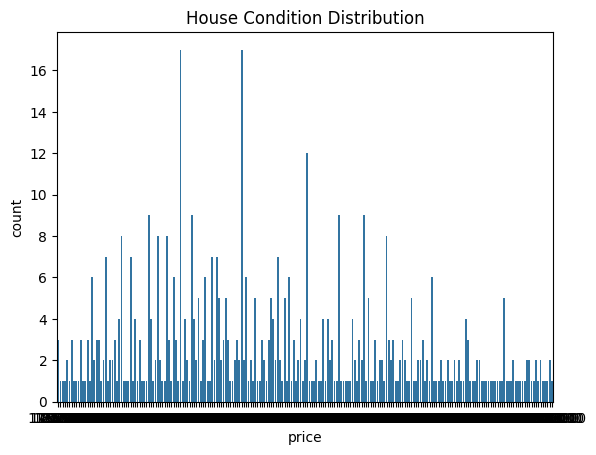

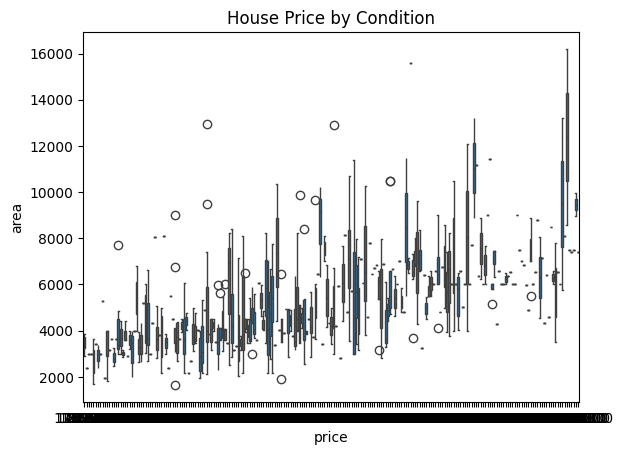

In [35]:
# Countplot for categorical features
sns.countplot(x=df['price'])
plt.title('House Condition Distribution')
plt.show()

# Boxplot to examine price by condition
sns.boxplot(x='price', y='area', data=df)
plt.title('House Price by Condition')
plt.show()


In [37]:
# One-hot encoding example
df_encoded = pd.get_dummies(df, columns=['price'], drop_first=True)

# outlier analysis

In [38]:
# Detecting outliers in price
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(f"Number of outliers in price: {len(outliers)}")


Number of outliers in price: 15


# Feature Importance

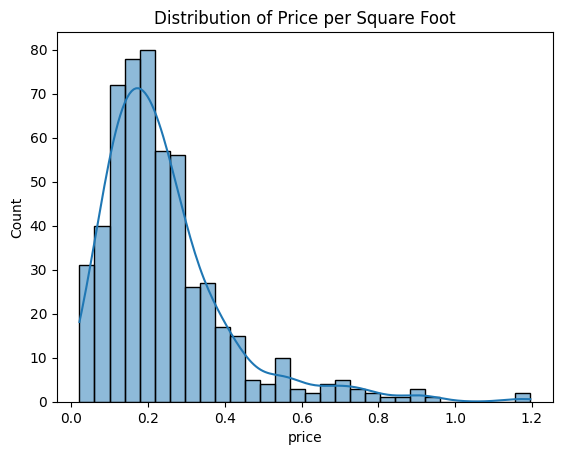

In [42]:
# Create an interaction feature (price per square foot)
df['price'] = df['price'] / df['area']

# Analyze the new feature
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Distribution of Price per Square Foot')
plt.show()


# Model building

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    float64
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
 13  price_log         545 non-null    float64
 14  price_per_sqft    545 non-null    float64
dtypes: float64(3), int64(5), object(7)
memory usage: 64.0+ KB


# Removing the outlier

In [50]:
df['z-score'] = (df['price'] - df['price'].mean())/df['price'].std()
df_no_outliers = df[np.abs(df['z-score'] < 3)]
print(df_no_outliers)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    0.241570  7420         4          2        3      yes        no       no   
1    0.152588  8960         4          4        4      yes        no       no   
2    0.123486  9960         3          2        2      yes        no      yes   
3    0.217156  7500         4          2        2      yes        no      yes   
4    0.207242  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540  0.202222  3000         2          1        1      yes        no      yes   
541  0.306797  2400         3          1        1       no        no       no   
542  0.133543  3620         2          1        1      yes        no       no   
543  0.206658  2910         3          1        1       no        no       no   
544  0.118064  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [51]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_log,price_per_sqft,z-score
0,0.241570,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,16.403275,1792.452830,0.000393
1,0.152588,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,16.321036,1367.187500,-0.533551
2,0.123486,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,16.321036,1229.919679,-0.708179
3,0.217156,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,16.318175,1628.666667,-0.146110
4,0.207242,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,16.250001,1537.735849,-0.205597


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    float64
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
 13  price_log         545 non-null    float64
 14  price_per_sqft    545 non-null    float64
 15  z-score           545 non-null    float64
dtypes: float64(4), int64(5), object(7)
memory us

In [53]:
# Example DataFrame
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
print(df_no_outliers)


        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    0.241570  7420         4          2        3      yes        no       no   
1    0.152588  8960         4          4        4      yes        no       no   
2    0.123486  9960         3          2        2      yes        no      yes   
3    0.217156  7500         4          2        2      yes        no      yes   
4    0.207242  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540  0.202222  3000         2          1        1      yes        no      yes   
541  0.306797  2400         3          1        1       no        no       no   
542  0.133543  3620         2          1        1      yes        no       no   
543  0.206658  2910         3          1        1       no        no       no   
544  0.118064  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [55]:
# Example threshold removal
df_no_outliers = df[(df['price'] >= 10) & (df['price'] <= 50)]
print(df_no_outliers)

Empty DataFrame
Columns: [price, area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus, price_log, price_per_sqft, z-score]
Index: []


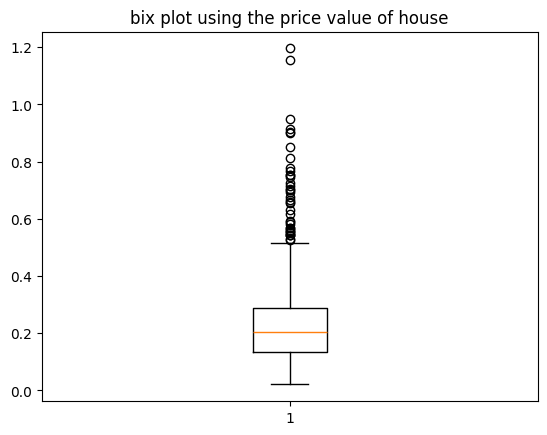

In [56]:
import matplotlib.pyplot as plt

plt.boxplot(df['price'])
plt.title("bix plot using the price value of house")
plt.show()

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
x = df.drop('price', axis = 1)
y = df[['price']]

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [70]:
print(x_train.head())

     area  bedrooms  bathrooms  stories mainroad guestroom basement  \
126  7160         3          1        1      yes        no      yes   
363  3584         2          1        1      yes        no       no   
370  4280         2          1        1      yes        no       no   
31   7000         3          1        4      yes        no       no   
113  9620         3          1        1      yes        no      yes   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  \
126              no              no        2      yes      unfurnished   
363             yes              no        0       no   semi-furnished   
370              no             yes        2       no   semi-furnished   
31               no             yes        2       no   semi-furnished   
113              no              no        2      yes        furnished   

     price_log  price_per_sqft   z-score  
126  15.587067      821.229050 -0.760919  
363  15.126542     1035.156250  0.283959  

In [71]:
from sklearn.preprocessing import LabelEncoder

# Example for Label Encoding
label_encoder = LabelEncoder()
x_train['main'] = label_encoder.fit_transform(x_train['category_column'])

# Example for One-Hot Encoding
x_train = pd.get_dummies(x_train, columns=['category_column'])


KeyError: 'category_column'